# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [23]:
# pip install citipy

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/geo/1.0/direct?q={city}&limit=5&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        latitude = response.json()[0]["lat"]
        longitude = response.json()[0]["lon"]
        # Parse the JSON and retrieve data
        city_weather = requests.get(url, params={'lat': latitude, 'lon': longitude, 'appid': weather_api_key, 'units': 'metric'}).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | papao
Processing Record 4 of Set 1 | las tablas
Processing Record 5 of Set 1 | amga
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | jabat
Processing Record 8 of Set 1 | dalandzadgad
City not found. Skipping...
Processing Record 9 of Set 1 | whangarei
Processing Record 10 of Set 1 | mount gambier
Processing Record 11 of Set 1 | chadron
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | nar'yan-mar
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | berezovo
Processing Record 17 of Set 1 | cabo san lucas
Processing Record 18 of Set 1 | belo sur tsiribihina
City not found. Skipping...
Processing Record 19 of Set 1 | flying fish cove
Processing Record 20 of Set 1 | port mathuri

Processing Record 32 of Set 4 | vila velha
Processing Record 33 of Set 4 | shar
Processing Record 34 of Set 4 | alaghsas
City not found. Skipping...
Processing Record 35 of Set 4 | nova vicosa
Processing Record 36 of Set 4 | az zuwaytinah
Processing Record 37 of Set 4 | tangalle
Processing Record 38 of Set 4 | yangor
Processing Record 39 of Set 4 | biankouma
Processing Record 40 of Set 4 | alofi
Processing Record 41 of Set 4 | the pas
Processing Record 42 of Set 4 | kolokani
Processing Record 43 of Set 4 | banda aceh
Processing Record 44 of Set 4 | zhanibek
City not found. Skipping...
Processing Record 45 of Set 4 | cumaribo
Processing Record 46 of Set 4 | oroso
Processing Record 47 of Set 4 | zaysan
Processing Record 48 of Set 4 | xinyuan
Processing Record 49 of Set 4 | ar rutbah
Processing Record 0 of Set 5 | burutu
Processing Record 1 of Set 5 | macau
Processing Record 2 of Set 5 | sishilichengzi
Processing Record 3 of Set 5 | askoy
Processing Record 4 of Set 5 | mokhsogollokh
Proce

Processing Record 20 of Set 8 | chipinge
Processing Record 21 of Set 8 | elista
Processing Record 22 of Set 8 | bandar lampung
Processing Record 23 of Set 8 | utrik
City not found. Skipping...
Processing Record 24 of Set 8 | bandarbeyla
Processing Record 25 of Set 8 | st. john's
Processing Record 26 of Set 8 | lihue
Processing Record 27 of Set 8 | buenaventura
Processing Record 28 of Set 8 | miri
Processing Record 29 of Set 8 | lerwick
Processing Record 30 of Set 8 | islamorada
Processing Record 31 of Set 8 | kultali
Processing Record 32 of Set 8 | horta
Processing Record 33 of Set 8 | kolonia
Processing Record 34 of Set 8 | mianyang
Processing Record 35 of Set 8 | alice springs
Processing Record 36 of Set 8 | alotau
Processing Record 37 of Set 8 | talcahuano
Processing Record 38 of Set 8 | gumdag
Processing Record 39 of Set 8 | santo antonio da platina
Processing Record 40 of Set 8 | belmonte
Processing Record 41 of Set 8 | buka
Processing Record 42 of Set 8 | arteche
Processing Recor

Processing Record 6 of Set 12 | timbuktu
Processing Record 7 of Set 12 | malangawa
Processing Record 8 of Set 12 | kashmar
Processing Record 9 of Set 12 | olinda
Processing Record 10 of Set 12 | taoudenni
Processing Record 11 of Set 12 | coro
Processing Record 12 of Set 12 | gaalkacyo
Processing Record 13 of Set 12 | labytnangi
Processing Record 14 of Set 12 | horbourg-wihr
Processing Record 15 of Set 12 | torghay
City not found. Skipping...
Processing Record 16 of Set 12 | palikir - national government center
City not found. Skipping...
Processing Record 17 of Set 12 | lorengau
Processing Record 18 of Set 12 | christchurch
Processing Record 19 of Set 12 | ternate
Processing Record 20 of Set 12 | sabha
Processing Record 21 of Set 12 | rosario oeste
Processing Record 22 of Set 12 | cannonvale
Processing Record 23 of Set 12 | ayod
Processing Record 24 of Set 12 | san andres tuxtla
Processing Record 25 of Set 12 | fortuna
Processing Record 26 of Set 12 | nuuk
Processing Record 27 of Set 1

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2806,-36.5098,9.12,91,100,5.30,GS,1707836414
1,papao,12.6919,-16.3792,38.06,34,0,2.06,SN,1707836416
2,las tablas,7.7678,-80.2764,27.26,99,100,6.53,PA,1707836418
3,amga,60.8942,131.9800,-28.55,99,100,1.56,RU,1707836421
4,bredasdorp,-34.5331,20.0428,25.34,48,17,7.48,ZA,1707836422


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2806,-36.5098,9.12,91,100,5.30,GS,1707836414
1,papao,12.6919,-16.3792,38.06,34,0,2.06,SN,1707836416
2,las tablas,7.7678,-80.2764,27.26,99,100,6.53,PA,1707836418
3,amga,60.8942,131.9800,-28.55,99,100,1.56,RU,1707836421
4,bredasdorp,-34.5331,20.0428,25.34,48,17,7.48,ZA,1707836422


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

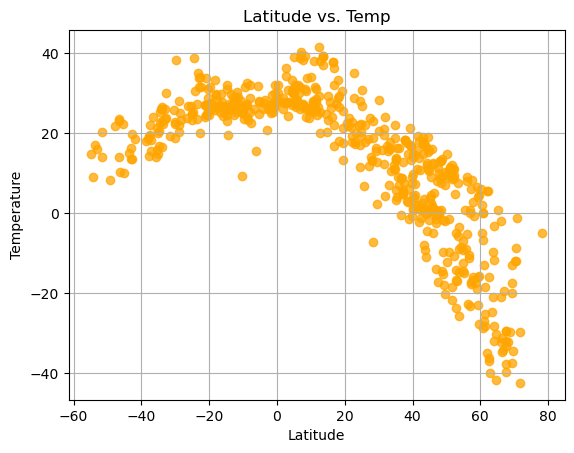

In [30]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = 'o', facecolor = 'orange', edgecolor = 'orange', alpha= .75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Latitude vs. Temp")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

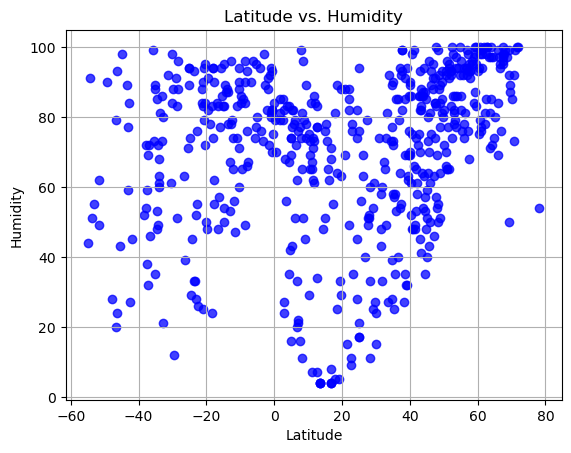

In [31]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = 'o', facecolor = 'blue', edgecolor = 'blue', alpha= .75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

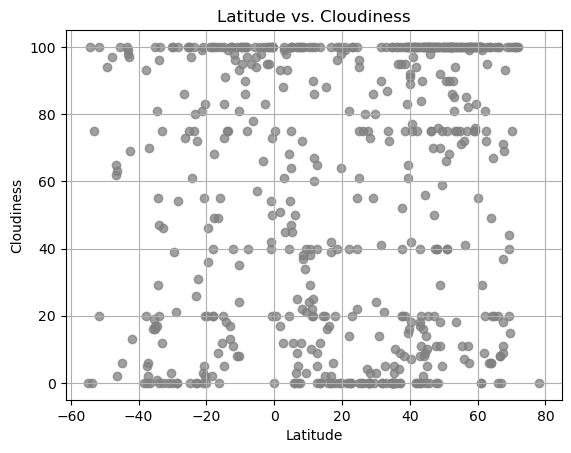

In [32]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = 'o', facecolor = 'grey', edgecolor = 'grey', alpha= .75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

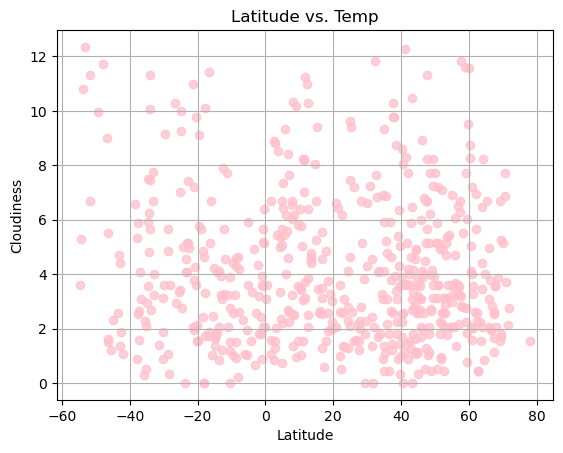

In [33]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = 'o', facecolor = 'pink', edgecolor = 'pink', alpha= .75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Latitude vs. Temp")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = (x_values * slope) + intercept
    equation = f' y={round(slope,2)}x + {round(intercept,2)}'
    plt.plot(x_values, regress_values, "-r")
    plt.annotate(equation, (min(x_values), max(y_values)), color = "red", fontsize = 10)
    print(f'The r-value is: {rvalue}')

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0, :]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,papao,12.6919,-16.3792,38.06,34,0,2.06,SN,1707836416
2,las tablas,7.7678,-80.2764,27.26,99,100,6.53,PA,1707836418
3,amga,60.8942,131.9800,-28.55,99,100,1.56,RU,1707836421
5,jabat,7.7521,168.9751,27.15,77,100,6.03,MH,1707836423
8,chadron,44.9601,3.9355,10.51,40,5,1.13,FR,1707836427


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<= 0, :]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2806,-36.5098,9.12,91,100,5.30,GS,1707836414
4,bredasdorp,-34.5331,20.0428,25.34,48,17,7.48,ZA,1707836422
6,whangarei,-35.7275,174.3194,14.11,99,16,0.28,NZ,1707836425
7,mount gambier,-37.8247,140.7820,14.42,54,93,5.33,AU,1707836426
10,port-aux-francais,-49.3498,70.2200,8.23,90,94,9.95,TF,1707836429


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8613126715271153


TypeError: cannot unpack non-iterable NoneType object

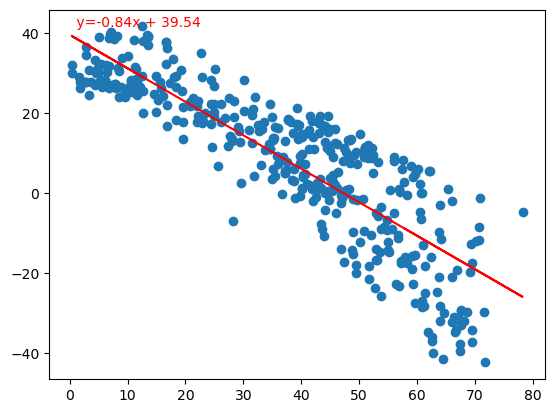

In [57]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Create scatter plot
plt.scatter(x_values, y_values)

# Perform linear regression
slope, intercept = linear_regression(x_values, y_values)

# Calculate regression line
regression_line = slope * x_values + intercept

# Plot regression line
plt.plot(x_values, regression_line, color='red')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Linear Regression on Northern Hemisphere')

plt.show()


The r-value is: 0.6017420469608068


TypeError: cannot unpack non-iterable NoneType object

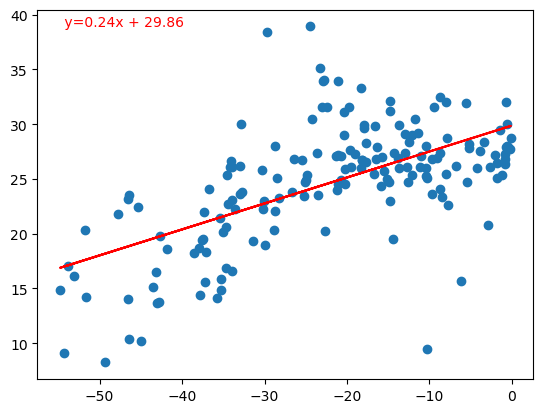

In [65]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Create scatter plot
plt.scatter(x_values, y_values)

# Perform linear regression
slope, intercept = linear_regression(x_values, y_values)

# Calculate regression line
regression_line = slope * x_values + intercept

# Plot regression line
plt.plot(x_values, regression_line, color='red')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Linear Regression on Southern Hemisphere')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4821774040712292


TypeError: cannot unpack non-iterable NoneType object

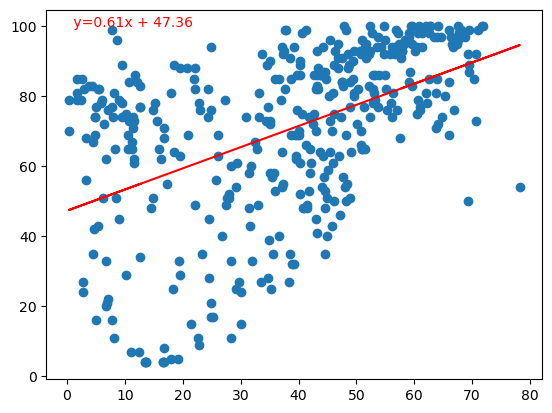

In [59]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Create scatter plot
plt.scatter(x_values, y_values)

# Perform linear regression
slope, intercept = linear_regression(x_values, y_values)

# Calculate regression line
regression_line = slope * x_values + intercept

# Plot regression line
plt.plot(x_values, regression_line, color='red')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Linear Regression on Northern Hemisphere')

plt.show()

The r-value is: 0.3520619325662178


TypeError: cannot unpack non-iterable NoneType object

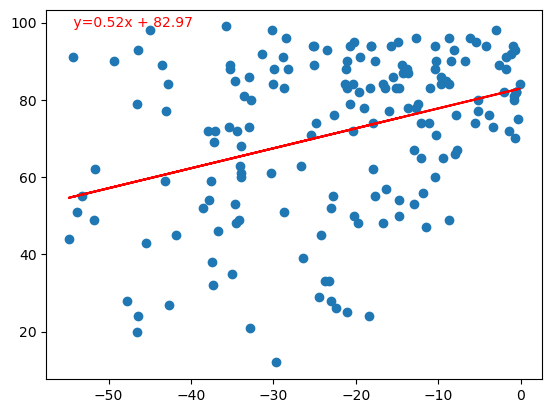

In [60]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Create scatter plot
plt.scatter(x_values, y_values)

# Perform linear regression
slope, intercept = linear_regression(x_values, y_values)

# Calculate regression line
regression_line = slope * x_values + intercept

# Plot regression line
plt.plot(x_values, regression_line, color='red')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Linear Regression on Southern Hemisphere')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.21472033299247467


TypeError: cannot unpack non-iterable NoneType object

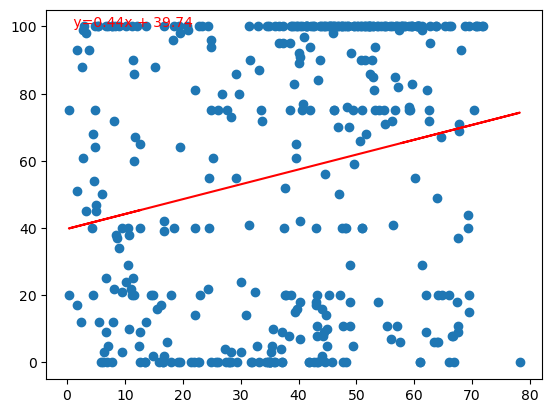

In [61]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Create scatter plot
plt.scatter(x_values, y_values)

# Perform linear regression
slope, intercept = linear_regression(x_values, y_values)

# Calculate regression line
regression_line = slope * x_values + intercept

# Plot regression line
plt.plot(x_values, regression_line, color='red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression on Northern Hemisphere')

plt.show()

The r-value is: 0.24573374005937731


TypeError: cannot unpack non-iterable NoneType object

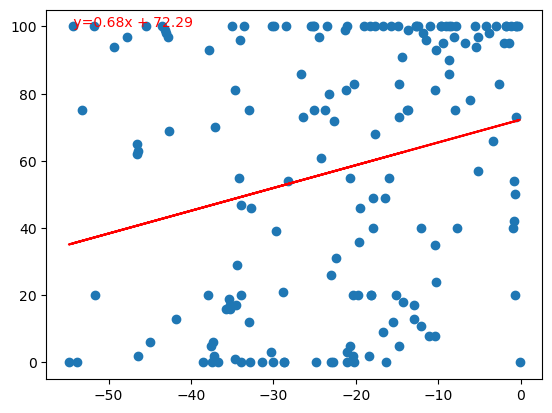

In [62]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
                            
# Create scatter plot
plt.scatter(x_values, y_values)

# Perform linear regression
slope, intercpet = linear_regression(x_values, y_values)

# Calculate regression line
regression_line = slope * x_values + intercept

# Plot regression line
plt.plot(x_values, regression_line, color='red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression on Southern Hemisphere')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.09498936117457278


TypeError: cannot unpack non-iterable NoneType object

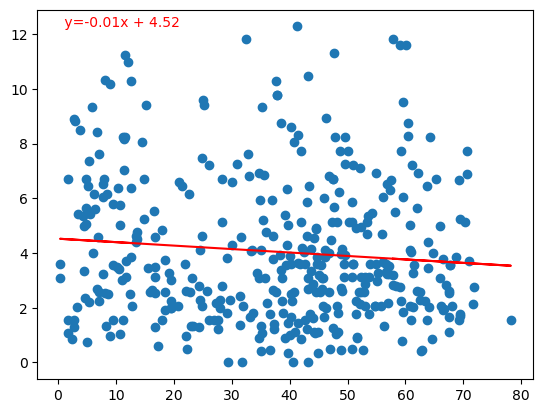

In [63]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Create scatter plot
plt.scatter(x_values, y_values)

# Perform linear regression
slope, intercept = linear_regression(x_values, y_values)

# Calculate regression line
regression_line = slope * x_values + intercept

# Plot regression line
plt.plot(x_values, regression_line, color='red')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression on Northern Hemisphere')

plt.show()

The r-value is: -0.28206915733730964


TypeError: cannot unpack non-iterable NoneType object

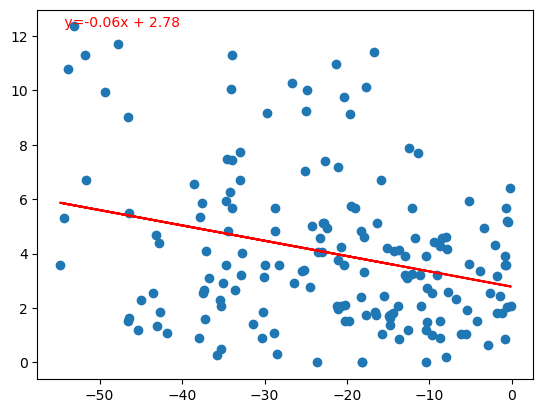

In [64]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Create scatter plot
plt.scatter(x_values, y_values)

# Perform linear regression
slope, intercept = linear_regression(x_values, y_values)

# Calculate regression line
regression_line = slope * x_values + intercept

# Plot regression line
plt.plot(x_values, regression_line, color='red')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression on Southern Hemisphere')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE